## Loading the Dataset

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib
from xgboost import XGBClassifier



In [162]:
period_df = pd.read_csv("Datasets/Period_Log.csv")
user_df = pd.read_csv("Datasets/User_Profile.csv")

In [163]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,NaN,Luteal,Heavy,9,Yes,6,...,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,33.0,Follicular,Light,2,No,8,...,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,33.0,Follicular,Heavy,8,No,5,...,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,34.0,Luteal,Light,3,No,8,...,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,31.0,Luteal,Moderate,3,No,9,...,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


In [164]:
user_df.head()

,user_id,state,age,bmi,diet_quality,exercise_frequency,sleep_hours,caffeine_intake,water_intake_liters,alcohol_consumption,smoking_status,birth_control_use,pcos_diagnosed,stress_score_baseline
0,U00001,Rhode Island,34,26.0,Good,5–6 days/week,5.4,1.5,2.0,Occasionally,No,1,1,4.1
1,U00002,New Hampshire,32,26.6,Good,5–6 days/week,5.5,2.9,2.3,Weekly,No,0,0,5.7
2,U00003,Iowa,18,16.0,Poor,1–2 days/week,6.7,0.5,2.1,Never,No,1,0,3.1
3,U00004,Texas,30,24.7,Excellent,NaN,7.3,0.4,1.8,Occasionally,No,1,0,6.6
4,U00005,Delaware,32,29.2,Good,1–2 days/week,7.1,2.2,2.2,Occasionally,No,0,1,3.1


## Data Cleaning 

In [165]:
period_df.shape

(17976, 21)

#### Exploring period_df

In [166]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 17976 non-null  object 
 1   cycle_number            17976 non-null  int64  
 2   start_date              17976 non-null  object 
 3   cycle_length_days       17976 non-null  int64  
 4   prev_cycle_length       15976 non-null  float64
 5   cycle_phase             17976 non-null  object 
 6   flow_level              17976 non-null  object 
 7   pain_level              17976 non-null  int64  
 8   pms_symptoms            17976 non-null  object 
 9   mood_score              17976 non-null  int64  
 10  stress_score_cycle      17976 non-null  float64
 11  sleep_hours_cycle       17976 non-null  float64
 12  energy_level            17976 non-null  int64  
 13  concentration_score     17976 non-null  int64  
 14  work_hours_lost         17976 non-null

#### Exploring user_df

In [167]:
user_df.shape

(2000, 14)

In [168]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2000 non-null   object 
 1   state                  2000 non-null   object 
 2   age                    2000 non-null   int64  
 3   bmi                    2000 non-null   float64
 4   diet_quality           2000 non-null   object 
 5   exercise_frequency     1615 non-null   object 
 6   sleep_hours            2000 non-null   float64
 7   caffeine_intake        2000 non-null   float64
 8   water_intake_liters    2000 non-null   float64
 9   alcohol_consumption    2000 non-null   object 
 10  smoking_status         2000 non-null   object 
 11  birth_control_use      2000 non-null   int64  
 12  pcos_diagnosed         2000 non-null   int64  
 13  stress_score_baseline  2000 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 218.9+ 

### Checking the missing values

In [169]:
period_df.isnull().sum()

user_id                      0
cycle_number                 0
start_date                   0
cycle_length_days            0
prev_cycle_length         2000
cycle_phase                  0
flow_level                   0
pain_level                   0
pms_symptoms                 0
mood_score                   0
stress_score_cycle           0
sleep_hours_cycle            0
energy_level                 0
concentration_score          0
work_hours_lost              0
estrogen_pgml                0
progesterone_ngml            0
ovulation_result             0
overall_health_score         0
log_consistency_score        0
prepared_before_period       0
dtype: int64

In [170]:
user_df.isnull().sum()

user_id                    0
state                      0
age                        0
bmi                        0
diet_quality               0
exercise_frequency       385
sleep_hours                0
caffeine_intake            0
water_intake_liters        0
alcohol_consumption        0
smoking_status             0
birth_control_use          0
pcos_diagnosed             0
stress_score_baseline      0
dtype: int64

### Handling the missing values

In [171]:
period_df = period_df.drop("prev_cycle_length", axis=1)

In [172]:
period_df.isnull().sum()

user_id                   0
cycle_number              0
start_date                0
cycle_length_days         0
cycle_phase               0
flow_level                0
pain_level                0
pms_symptoms              0
mood_score                0
stress_score_cycle        0
sleep_hours_cycle         0
energy_level              0
concentration_score       0
work_hours_lost           0
estrogen_pgml             0
progesterone_ngml         0
ovulation_result          0
overall_health_score      0
log_consistency_score     0
prepared_before_period    0
dtype: int64

In [173]:
period_df.shape

(17976, 20)

In [174]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'cycle_phase', 'flow_level', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'ovulation_result', 'overall_health_score',
       'log_consistency_score', 'prepared_before_period'],
      dtype='object')

In [175]:
user_df["exercise_frequency"].unique()

array(['5–6 days/week', '1–2 days/week', nan, '3–4 days/week'],
      dtype=object)

In [176]:

user_df['exercise_frequency'].value_counts(dropna=False)

exercise_frequency
3–4 days/week    734
1–2 days/week    605
NaN              385
5–6 days/week    276
Name: count, dtype: int64

### Impute missing values as 0

In [177]:
mapping = {
    '1–2 days/week': 1.5,
    '3–4 days/week': 3.5,
    '5–6 days/week': 5.5
}

user_df['exercise_frequency'] = user_df['exercise_frequency'].map(mapping)


In [178]:
user_df['exercise_frequency'].unique()

array([5.5, 1.5, nan, 3.5])

In [179]:
user_df['exercise_frequency'] = user_df['exercise_frequency'].fillna(0)


In [180]:
user_df['exercise_frequency'].unique()

array([5.5, 1.5, 0. , 3.5])

In [181]:
user_df['exercise_frequency'].value_counts()

exercise_frequency
3.5    734
1.5    605
0.0    385
5.5    276
Name: count, dtype: int64

In [182]:
period_df.isnull().sum()

user_id                   0
cycle_number              0
start_date                0
cycle_length_days         0
cycle_phase               0
flow_level                0
pain_level                0
pms_symptoms              0
mood_score                0
stress_score_cycle        0
sleep_hours_cycle         0
energy_level              0
concentration_score       0
work_hours_lost           0
estrogen_pgml             0
progesterone_ngml         0
ovulation_result          0
overall_health_score      0
log_consistency_score     0
prepared_before_period    0
dtype: int64

In [183]:
user_df.isnull().sum()

user_id                  0
state                    0
age                      0
bmi                      0
diet_quality             0
exercise_frequency       0
sleep_hours              0
caffeine_intake          0
water_intake_liters      0
alcohol_consumption      0
smoking_status           0
birth_control_use        0
pcos_diagnosed           0
stress_score_baseline    0
dtype: int64

In [184]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,Luteal,Heavy,9,Yes,6,5.4,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,Follicular,Light,2,No,8,3.7,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,Follicular,Heavy,8,No,5,5.7,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,Luteal,Light,3,No,8,5.2,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,Luteal,Moderate,3,No,9,3.7,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


#### Calculating next period date and days to next period as it is our target

In [185]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,Luteal,Heavy,9,Yes,6,5.4,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,Follicular,Light,2,No,8,3.7,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,Follicular,Heavy,8,No,5,5.7,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,Luteal,Light,3,No,8,5.2,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,Luteal,Moderate,3,No,9,3.7,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


In [186]:
period_df['start_date'] = pd.to_datetime(period_df['start_date'])

In [187]:
period_df['start_date'].dtype

dtype('<M8[ns]')

In [188]:
period_df['next_period_date'] = period_df['start_date'] + pd.to_timedelta(period_df['cycle_length_days'], unit='D')
period_df['next_period_date']

0       2024-03-17
1       2024-04-19
2       2024-05-23
3       2024-06-23
4       2024-07-24
           ...    
17971   2024-08-01
17972   2024-08-28
17973   2024-09-27
17974   2024-10-26
17975   2024-11-22
Name: next_period_date, Length: 17976, dtype: datetime64[ns]

In [189]:
period_df['days_to_next_period'] = (period_df['next_period_date'] - period_df['start_date']).dt.days

In [190]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,...,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period,next_period_date,days_to_next_period
0,U00001,1,2024-02-13,33,Luteal,Heavy,9,Yes,6,5.4,...,7,5.1,84.7,4.14,Positive,6.5,0.949,0,2024-03-17,33
1,U00001,2,2024-03-17,33,Follicular,Light,2,No,8,3.7,...,8,2.6,126.1,2.79,Negative,9.4,0.949,1,2024-04-19,33
2,U00001,3,2024-04-19,34,Follicular,Heavy,8,No,5,5.7,...,5,6.8,131.1,1.70,Negative,6.7,0.949,1,2024-05-23,34
3,U00001,4,2024-05-23,31,Luteal,Light,3,No,8,5.2,...,8,2.5,82.0,8.50,Negative,9.0,0.949,0,2024-06-23,31
4,U00001,5,2024-06-23,31,Luteal,Moderate,3,No,9,3.7,...,8,2.4,55.5,6.30,Negative,9.3,0.949,1,2024-07-24,31


In [191]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 17976 non-null  object        
 1   cycle_number            17976 non-null  int64         
 2   start_date              17976 non-null  datetime64[ns]
 3   cycle_length_days       17976 non-null  int64         
 4   cycle_phase             17976 non-null  object        
 5   flow_level              17976 non-null  object        
 6   pain_level              17976 non-null  int64         
 7   pms_symptoms            17976 non-null  object        
 8   mood_score              17976 non-null  int64         
 9   stress_score_cycle      17976 non-null  float64       
 10  sleep_hours_cycle       17976 non-null  float64       
 11  energy_level            17976 non-null  int64         
 12  concentration_score     17976 non-null  int64 

### Data Exploration

#### Categorical Feature Analysis

In [192]:
categorical_cols = period_df.select_dtypes(include = 'object')
print(categorical_cols.columns)

Index(['user_id', 'cycle_phase', 'flow_level', 'pms_symptoms',
       'ovulation_result'],
      dtype='object')


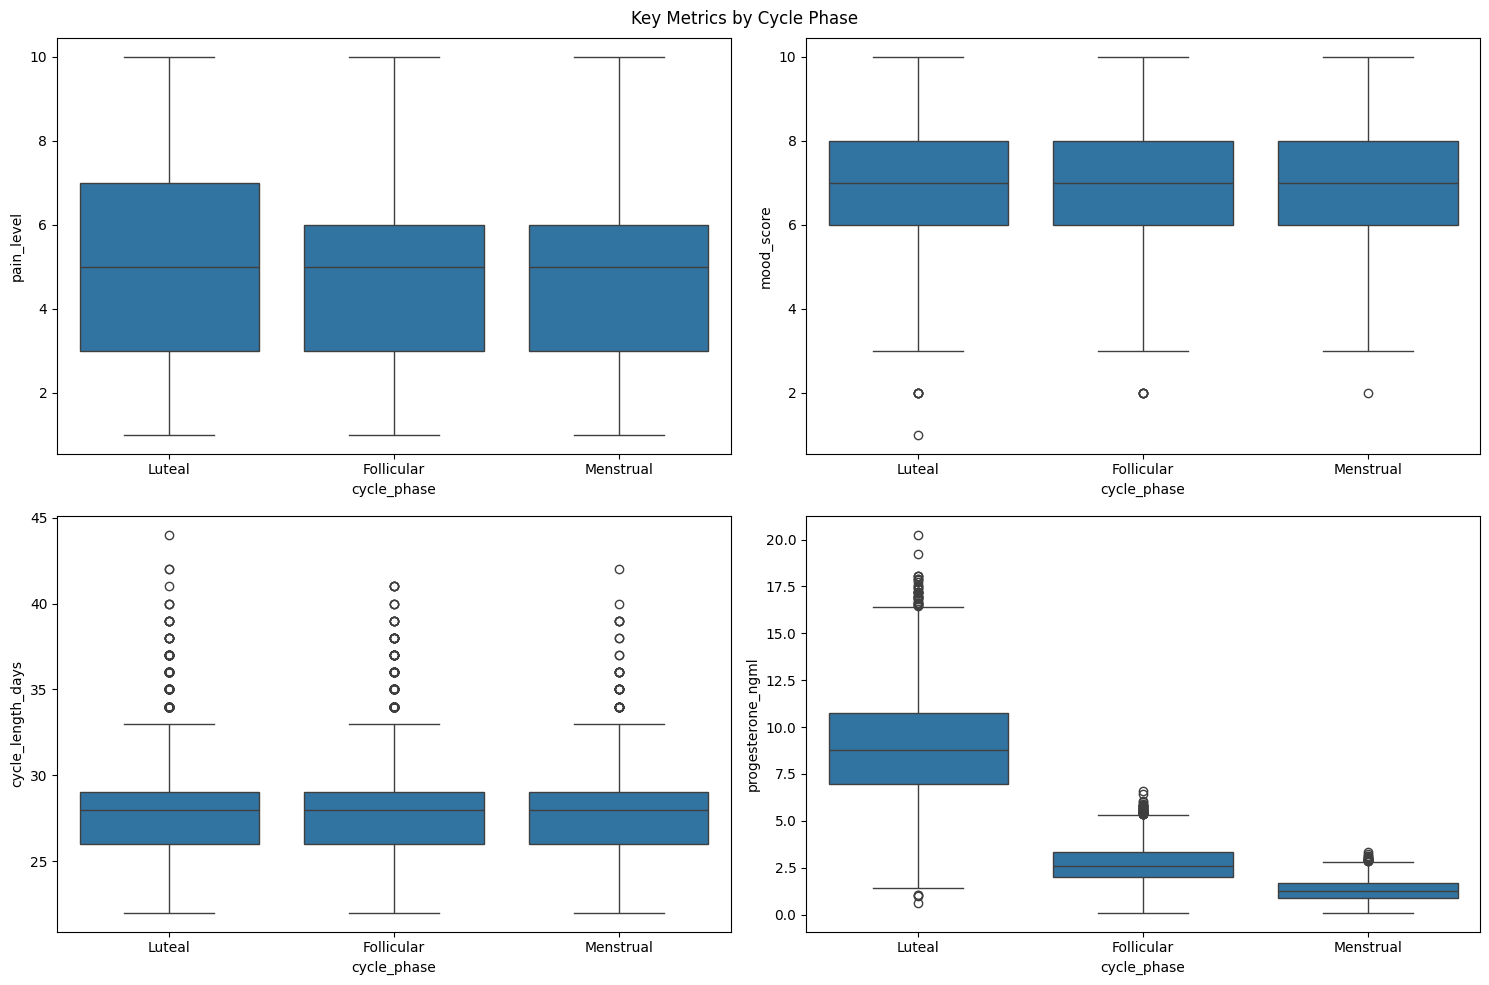

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=period_df, x='cycle_phase', y='pain_level', ax=axes[0,0])
sns.boxplot(data=period_df, x='cycle_phase', y='mood_score', ax=axes[0,1])
sns.boxplot(data=period_df, x='cycle_phase', y='cycle_length_days', ax=axes[1,0])
sns.boxplot(data=period_df, x='cycle_phase', y='progesterone_ngml', ax=axes[1,1])
plt.suptitle('Key Metrics by Cycle Phase')
plt.tight_layout()
plt.show()


#### Insights

- **Median cycle length:** ~28 days across all three phases.
- **Outliers:** Some cycles reach up to ≈40–44 days, indicating that significantly longer cycles are rare.
- **Cycle pattern:** Most cycles remain around 28 days.
- **Progesterone levels:**
  - **Luteal phase:** Much higher
  - **Follicular/Menstrual phases:** Low


### Numerical Feature Analysis

In [194]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 17976 non-null  object        
 1   cycle_number            17976 non-null  int64         
 2   start_date              17976 non-null  datetime64[ns]
 3   cycle_length_days       17976 non-null  int64         
 4   cycle_phase             17976 non-null  object        
 5   flow_level              17976 non-null  object        
 6   pain_level              17976 non-null  int64         
 7   pms_symptoms            17976 non-null  object        
 8   mood_score              17976 non-null  int64         
 9   stress_score_cycle      17976 non-null  float64       
 10  sleep_hours_cycle       17976 non-null  float64       
 11  energy_level            17976 non-null  int64         
 12  concentration_score     17976 non-null  int64 

In [195]:
numerical_cols = period_df.select_dtypes(include=['int64', 'float64'])
print(numerical_cols.columns)

Index(['cycle_number', 'cycle_length_days', 'pain_level', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'days_to_next_period'],
      dtype='object')


### Correlation Matrix - HeatMap

In [196]:
numerical_cols_list = period_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols_list)

Index(['cycle_number', 'cycle_length_days', 'pain_level', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'days_to_next_period'],
      dtype='object')


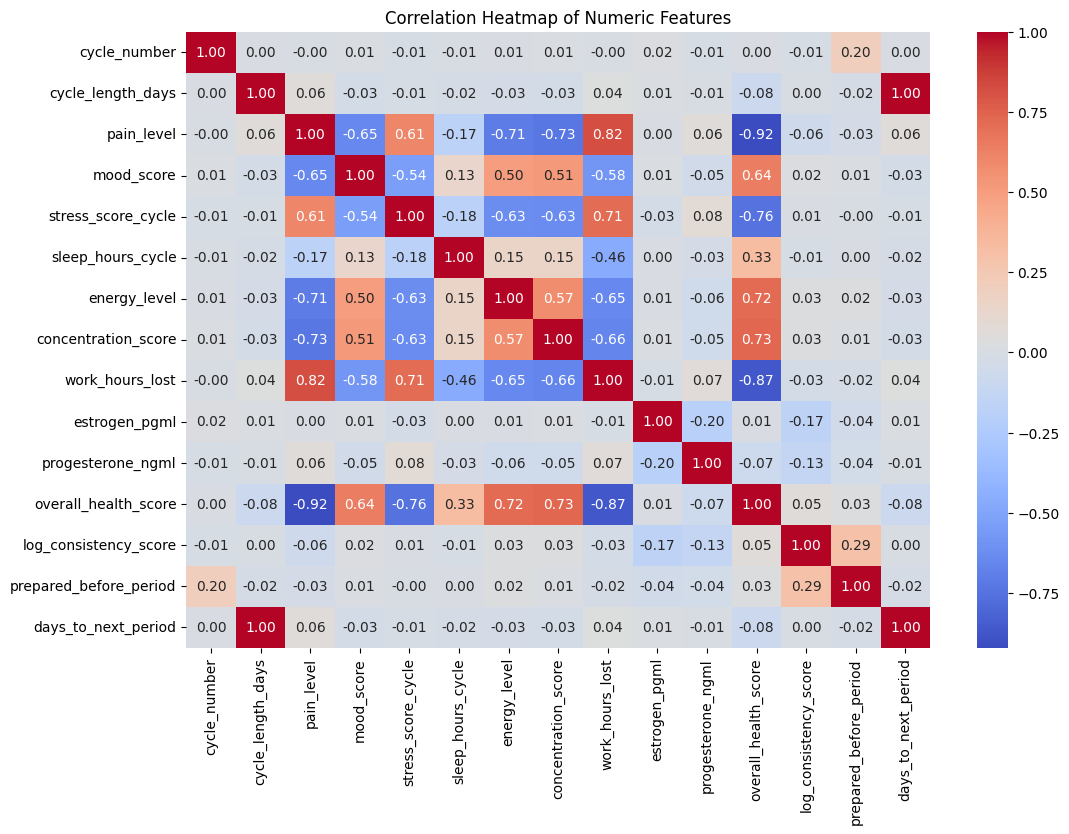

In [197]:
corr = period_df[numerical_cols_list].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Model Training

### Linear Model with Numeric Features Only

#### Choosing features and target

In [198]:
feature_cols = ['pain_level', 'mood_score', 'stress_score_cycle', 'sleep_hours_cycle', 'energy_level', 'concentration_score']

X_num = period_df[feature_cols]
y_num = period_df['days_to_next_period']

#### Train-test Split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

#### Fit linear regression model

In [200]:
model_num = LinearRegression()
model_num.fit(X_train, y_train)

LinearRegression()

In [201]:
y_pred = model_num.predict(X_test)

In [202]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Regression Metrics for Numerical Features")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Regression Metrics for Numerical Features
MAE: 1.8325548190631156
RMSE: 2.3978238933829457
R²: 0.005179322278665022


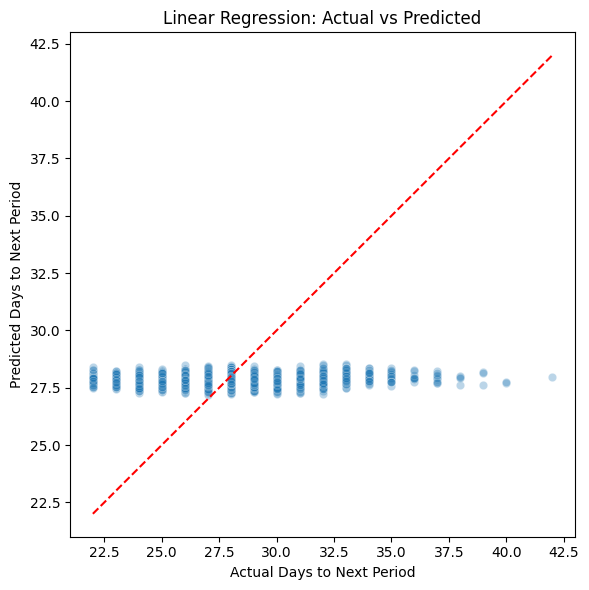

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel('Actual Days to Next Period')
plt.ylabel('Predicted Days to Next Period')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()


### Linear Model with Numerical and Categorical Features

In [204]:
for col in categorical_cols.columns:
    unique_count = categorical_cols[col].nunique()
    print(f"{col}: {unique_count} unique values")
    print(f"  Values: {categorical_cols[col].unique()}\n")

user_id: 2000 unique values
  Values: ['U00001' 'U00002' 'U00003' ... 'U01998' 'U01999' 'U02000']

cycle_phase: 3 unique values
  Values: ['Luteal' 'Follicular' 'Menstrual']

flow_level: 3 unique values
  Values: ['Heavy' 'Light' 'Moderate']

pms_symptoms: 2 unique values
  Values: ['Yes' 'No']

ovulation_result: 2 unique values
  Values: ['Positive' 'Negative']



#### Binary Mapping

In [205]:
period_df['pms_symptoms'] = period_df['pms_symptoms'].map({'Yes': 1 , 'No': 0})
period_df['ovulation_result'] = period_df['ovulation_result'].map({'Positive': 1, 'Negative': 0})

#### One-hot encoding

In [206]:
cols_for_one_hot = ['cycle_phase', 'flow_level']

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(period_df[cols_for_one_hot])

In [207]:
print(encoded_array)

[[0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]]


In [208]:
encoded_cols_names = encoder.get_feature_names_out(cols_for_one_hot)
print(encoded_cols_names)


['cycle_phase_Follicular' 'cycle_phase_Luteal' 'cycle_phase_Menstrual'
 'flow_level_Heavy' 'flow_level_Light' 'flow_level_Moderate']


In [209]:
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols_names, index=period_df.index)

In [210]:
period_df = period_df.drop(columns=cols_for_one_hot).join(encoded_df)

In [211]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,...,log_consistency_score,prepared_before_period,next_period_date,days_to_next_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual,flow_level_Heavy,flow_level_Light,flow_level_Moderate
0,U00001,1,2024-02-13,33,9,1,6,5.4,5.3,6,...,0.949,0,2024-03-17,33,0.0,1.0,0.0,1.0,0.0,0.0
1,U00001,2,2024-03-17,33,2,0,8,3.7,4.6,7,...,0.949,1,2024-04-19,33,1.0,0.0,0.0,0.0,1.0,0.0
2,U00001,3,2024-04-19,34,8,0,5,5.7,5.1,5,...,0.949,1,2024-05-23,34,1.0,0.0,0.0,1.0,0.0,0.0
3,U00001,4,2024-05-23,31,3,0,8,5.2,6.7,8,...,0.949,0,2024-06-23,31,0.0,1.0,0.0,0.0,1.0,0.0
4,U00001,5,2024-06-23,31,3,0,9,3.7,5.8,9,...,0.949,1,2024-07-24,31,0.0,1.0,0.0,0.0,0.0,1.0


In [212]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'pain_level', 'pms_symptoms', 'mood_score', 'stress_score_cycle',
       'sleep_hours_cycle', 'energy_level', 'concentration_score',
       'work_hours_lost', 'estrogen_pgml', 'progesterone_ngml',
       'ovulation_result', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'next_period_date', 'days_to_next_period',
       'cycle_phase_Follicular', 'cycle_phase_Luteal', 'cycle_phase_Menstrual',
       'flow_level_Heavy', 'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

### Numerical Features after encoding

In [213]:
numerical_cols_encoded = period_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols_encoded)

Index(['cycle_number', 'cycle_length_days', 'pain_level', 'pms_symptoms',
       'mood_score', 'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'ovulation_result', 'overall_health_score',
       'log_consistency_score', 'prepared_before_period',
       'days_to_next_period', 'cycle_phase_Follicular', 'cycle_phase_Luteal',
       'cycle_phase_Menstrual', 'flow_level_Heavy', 'flow_level_Light',
       'flow_level_Moderate'],
      dtype='object')


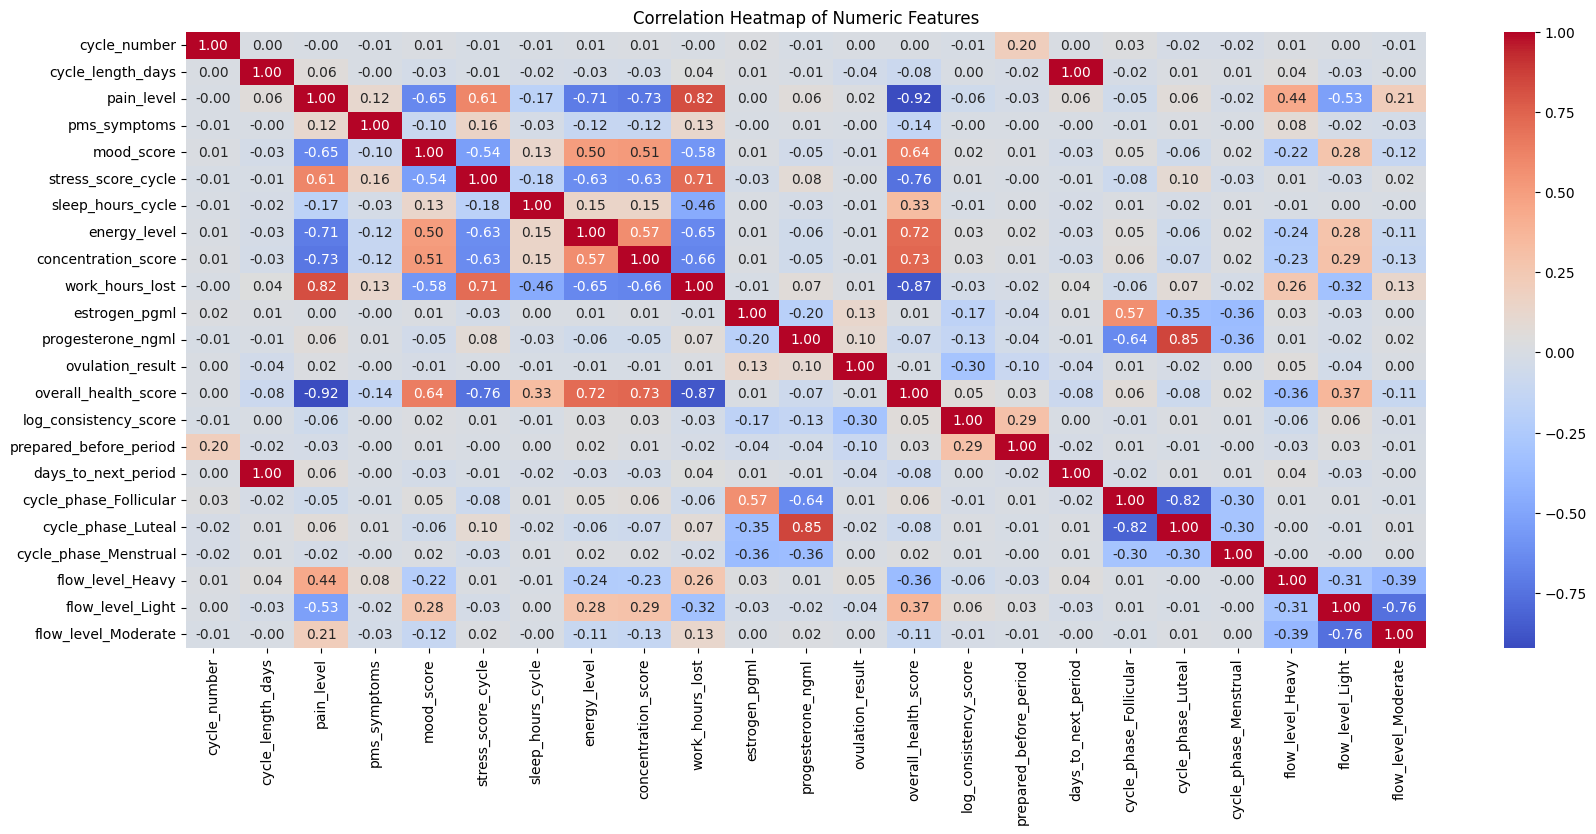

In [214]:
corr = period_df[numerical_cols_encoded].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### Feature selection

In [215]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'pain_level', 'pms_symptoms', 'mood_score', 'stress_score_cycle',
       'sleep_hours_cycle', 'energy_level', 'concentration_score',
       'work_hours_lost', 'estrogen_pgml', 'progesterone_ngml',
       'ovulation_result', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'next_period_date', 'days_to_next_period',
       'cycle_phase_Follicular', 'cycle_phase_Luteal', 'cycle_phase_Menstrual',
       'flow_level_Heavy', 'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

In [216]:
target  = 'days_to_next_period'
drop_cols = ['user_id', 'start_date', 'cycle_length_days', 'work_hours_lost' ,'next_period_date',  'log_consistency_score']

In [217]:
X = period_df.drop(columns=drop_cols + [target]) 
y = period_df[target]

In [218]:
X

,cycle_number,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,prepared_before_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual,flow_level_Heavy,flow_level_Light,flow_level_Moderate
0,1,9,1,6,5.4,5.3,6,7,84.7,4.14,1,6.5,0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,2,0,8,3.7,4.6,7,8,126.1,2.79,0,9.4,1,1.0,0.0,0.0,0.0,1.0,0.0
2,3,8,0,5,5.7,5.1,5,5,131.1,1.70,0,6.7,1,1.0,0.0,0.0,1.0,0.0,0.0
3,4,3,0,8,5.2,6.7,8,8,82.0,8.50,0,9.0,0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,3,0,9,3.7,5.8,9,8,55.5,6.30,0,9.3,1,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,6,6,0,7,6.0,5.2,6,7,77.5,5.31,0,8.1,1,0.0,1.0,0.0,0.0,0.0,1.0
17972,7,6,1,7,8.2,5.6,8,6,65.5,0.74,1,7.6,1,0.0,0.0,1.0,0.0,0.0,1.0
17973,8,6,0,5,7.6,4.5,6,7,51.9,1.26,0,7.6,0,0.0,0.0,1.0,0.0,0.0,1.0
17974,9,3,0,8,7.2,4.9,6,8,85.3,8.99,1,8.8,1,0.0,1.0,0.0,0.0,1.0,0.0


#### Train test split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression after Encoding

In [220]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [221]:
y_pred = model.predict(X_test)


In [222]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Regression Metrics")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Regression Metrics
MAE: 1.8195806472381653
RMSE: 2.3587369969254888
R²: 0.037348094512095975


### Using Decision Tree and Random Forest 

In [223]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [224]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} (No Tuning) ---")
    print("MAE:\n", mean_absolute_error(y_test, y_pred))
    print("RMSE:\n", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:\n", r2_score(y_test, y_pred))
    print("\n")

--- Decision Tree (No Tuning) ---
MAE:
 2.671579532814238
RMSE:
 3.492603020967165
R²:
 -1.11061338198538


--- Random Forest (No Tuning) ---
MAE:
 1.8531256952169077
RMSE:
 2.4048161146021236
R²:
 -0.0006310696940248217




### Hyperparameter Tuning using RandomizedSearchCV

#### Random Forest

In [230]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=100, num=3)]

# number of features to consider at every split
max_features = ['sqrt', 'log2']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, 3)]

# minimum number of samples required to split a node
min_samples_split = [2, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]

criterion = ['squared_error', 'absolute_error']

# create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}

print(random_grid)

{'n_estimators': [50, 75, 100], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'criterion': ['squared_error', 'absolute_error']}


In [231]:
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid,
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error',
    verbose=2, 
    random_state=42, 
    n_jobs=1
    )
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.2min
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.3min
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.2min
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.5s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.6s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, m

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [50, 75, 100]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [232]:
rf_randomcv.best_params_

{'n_estimators': 75,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [233]:
import joblib
joblib.dump(rf_randomcv, 'rf_randomcv_best1.pkl')

['rf_randomcv_best1.pkl']

In [234]:
rf_randomcv = joblib.load('rf_randomcv_best1.pkl')

print(rf_randomcv.best_params_)

{'n_estimators': 75, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'absolute_error'}


In [235]:
best_rf = rf_randomcv.best_estimator_

In [236]:
best_rf

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=75)

In [237]:
y_pred = best_rf.predict(X_test)
print(f"--- {name} (After Tuning) ---")
print("MAE:\n", mean_absolute_error(y_test, y_pred))
print("RMSE:\n", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:\n", r2_score(y_test, y_pred))
print("\n")

--- Random Forest (After Tuning) ---
MAE:
 1.829740452354468
RMSE:
 2.407969249505244
R²:
 -0.0032567949561466136




### Removing Estrogen and Progesterone from features

In [225]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'pain_level', 'pms_symptoms', 'mood_score', 'stress_score_cycle',
       'sleep_hours_cycle', 'energy_level', 'concentration_score',
       'work_hours_lost', 'estrogen_pgml', 'progesterone_ngml',
       'ovulation_result', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'next_period_date', 'days_to_next_period',
       'cycle_phase_Follicular', 'cycle_phase_Luteal', 'cycle_phase_Menstrual',
       'flow_level_Heavy', 'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

In [226]:
target  = 'days_to_next_period'
drop_cols = ['user_id', 'start_date', 'cycle_length_days', 'work_hours_lost' , 'estrogen_pgml', 'progesterone_ngml', 'next_period_date',  'log_consistency_score']

In [256]:
X_no_hormones = period_df.drop(columns=drop_cols + [target]) 
y_no_hormones = period_df[target]

In [257]:
X_no_hormones.columns

Index(['cycle_number', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'ovulation_result', 'overall_health_score',
       'prepared_before_period', 'cycle_phase_Follicular',
       'cycle_phase_Luteal', 'cycle_phase_Menstrual', 'flow_level_Heavy',
       'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

In [258]:
X_no_hormones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_number            17976 non-null  int64  
 1   pain_level              17976 non-null  int64  
 2   pms_symptoms            17976 non-null  int64  
 3   mood_score              17976 non-null  int64  
 4   stress_score_cycle      17976 non-null  float64
 5   sleep_hours_cycle       17976 non-null  float64
 6   energy_level            17976 non-null  int64  
 7   concentration_score     17976 non-null  int64  
 8   ovulation_result        17976 non-null  int64  
 9   overall_health_score    17976 non-null  float64
 10  prepared_before_period  17976 non-null  int64  
 11  cycle_phase_Follicular  17976 non-null  float64
 12  cycle_phase_Luteal      17976 non-null  float64
 13  cycle_phase_Menstrual   17976 non-null  float64
 14  flow_level_Heavy        17976 non-null

### Train Test Split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_no_hormones, y_no_hormones, test_size=0.2, random_state=42)

### Random Forest

In [260]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=100, num=3)]

# number of features to consider at every split
max_features = ['sqrt', 'log2']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, 3)]

# minimum number of samples required to split a node
min_samples_split = [2, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]

criterion = ['squared_error', 'absolute_error']

# create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}

print(random_grid)

{'n_estimators': [50, 75, 100], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'criterion': ['squared_error', 'absolute_error']}


In [261]:
X_train.columns

Index(['cycle_number', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'ovulation_result', 'overall_health_score',
       'prepared_before_period', 'cycle_phase_Follicular',
       'cycle_phase_Luteal', 'cycle_phase_Menstrual', 'flow_level_Heavy',
       'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

In [262]:
X_test.columns

Index(['cycle_number', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'ovulation_result', 'overall_health_score',
       'prepared_before_period', 'cycle_phase_Follicular',
       'cycle_phase_Luteal', 'cycle_phase_Menstrual', 'flow_level_Heavy',
       'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

In [263]:
rf_no_hormones = RandomForestRegressor()
rf_randomcv_no_hormones = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid,
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error',
    verbose=2, 
    random_state=42, 
    n_jobs=1
    )
rf_randomcv_no_hormones.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.7min
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.3min
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 1.1min
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.4s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.6s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, m

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [50, 75, 100]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [264]:
rf_randomcv_no_hormones.best_params_

{'n_estimators': 75,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [265]:
joblib.dump(rf_randomcv_no_hormones, 'rf_randomcv_no_hormones.pkl')


['rf_randomcv_no_hormones.pkl']

In [266]:
rf_randomcv_no_hormones = joblib.load('rf_randomcv_no_hormones.pkl')

In [267]:
print(rf_randomcv_no_hormones.best_params_)

{'n_estimators': 75, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'absolute_error'}


In [268]:
best_rf_no_hormones = rf_randomcv_no_hormones.best_estimator_

best_rf_no_hormones

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=75)

In [269]:
y_pred = best_rf_no_hormones.predict(X_test)

print(f"--- {name} (After Tuning) ---")
print("MAE:\n", mean_absolute_error(y_test, y_pred))
print("RMSE:\n", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:\n", r2_score(y_test, y_pred))
print("\n")

--- Random Forest (After Tuning) ---
MAE:
 1.8295587690025954
RMSE:
 2.4063786922634716
R²:
 -0.0019318525071174708


